# Imports & Definitions

In [71]:
import os
import sys
import math
import matplotlib
import pickle
import gensim
import sklearn
import sklearn.manifold
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# 'Martin Eden' and 'Portrait of Dorian Gray' from Gutenberg.org
TEXTS = ('1056.txt', '174.txt')

# word2vec default hyperparams
w2v_size = 100
w2v_window = 5
w2v_min_count = 1
w2v_sg = 0

In [0]:
def form_model_filename(text_filename):
  return f"{text_filename.split('.')[0]}_size{w2v_size}_window{w2v_window}_mincount{w2v_min_count}_sg{w2v_sg}.model"


def form_idf_filename(text_filename):
  return f"{text_filename.split('.')[0]}.idf"


def form_model_test_description(window, sg):
  return f"Testing Model. Window size = {window_size}. Algo = {'Skip-Gram' if sg else 'CBOW'}."


def test_queries(martin_eden_model):
  pairs = [
    ['Martin', 'Eden'],
    ['Ruth', 'Morse'],
    ['working', 'class'],
    ['write', 'book'],
    ['ship', 'sea']
  ]
  for pair in pairs:
    similarity = martin_eden_model.wv.similarity(pair[0], pair[1])
    print(f"similarity between '{pair[0]}' & '{pair[1]}': {similarity}")

#Tasks

In [76]:
#@title 1. Train embeddings on 2 books from gutenberg, save the models on disk

for text_filename in TEXTS:
  with open(text_filename, 'r') as book_file:
    corpus = book_file.read()

  model = gensim.models.Word2Vec(
    [nltk.tokenize.word_tokenize(sent) for sent in nltk.tokenize.sent_tokenize(corpus)],
    size=w2v_size,
    window=w2v_window,
    min_count=w2v_min_count,
    workers=4,
    sg=w2v_sg
  )

  model.save(form_model_filename(text_filename))
print(os.listdir())

['.config', '174_size100_window5_mincount1_sg0.model', '174.txt', '.ipynb_checkpoints', '1056_size100_window5_mincount1_sg0.model', '1056.txt', 'sample_data']


In [77]:
#@title 2. Use a few input searches with .most_similiary() of gensim

model = gensim.models.Word2Vec.load(form_model_filename('1056.txt'))
print('Martin Eden')
print()

print('Most similar to Martin:')
print(model.wv.most_similar(positive=['Martin']))

print('Most similar to Eden:')
print(model.wv.most_similar(positive=['Eden']))

print('Most similar to ship:')
print(model.wv.most_similar(positive=['ship']))

print('Most similar to write:')
print(model.wv.most_similar(positive=['write']))

print()
print()

model = gensim.models.Word2Vec.load(form_model_filename('174.txt'))
print('Portrait of Dorian Gray')
print()

print('Most similar to Dorian:')
print(model.wv.most_similar(positive=['Dorian']))

print('Most similar to Gray:')
print(model.wv.most_similar(positive=['Gray']))

print('Most similar to king:')
print(model.wv.most_similar(positive=['king']))

print('Most similar to friend:')
print(model.wv.most_similar(positive=['friend']))

Martin Eden

Most similar to Martin:
[('quick', 0.998165488243103), ('other', 0.9980524778366089), ('same', 0.9979510307312012), ('morning', 0.9979153275489807), ('black', 0.9979038238525391), ('class', 0.9978923201560974), ('published', 0.9978808164596558), ('stories', 0.9978718757629395), ('their', 0.9978704452514648), ('magazines', 0.9978246688842773)]
Most similar to Eden:
[('pretty', 0.9986750483512878), ('Then', 0.9984575510025024), ('cried', 0.9984310269355774), ('Mr.', 0.9984290599822998), ('about', 0.9982941150665283), ('beautiful', 0.9982278347015381), ('then', 0.9982266426086426), ('Ends', 0.9982201457023621), ('beginning', 0.9981927871704102), ('$', 0.9981688261032104)]
Most similar to ship:
[('set', 0.9984241724014282), ('save', 0.9983864426612854), ('number', 0.998366117477417), ('young', 0.9983628392219543), ('works', 0.9983335137367249), ('public', 0.9983315467834473), ('form', 0.9983226656913757), ('Gutenberg-tm', 0.9983193874359131), ('cents', 0.9983147382736206), ('m

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


start TSNE for 1056.txt
end TSNE for 1056.txt


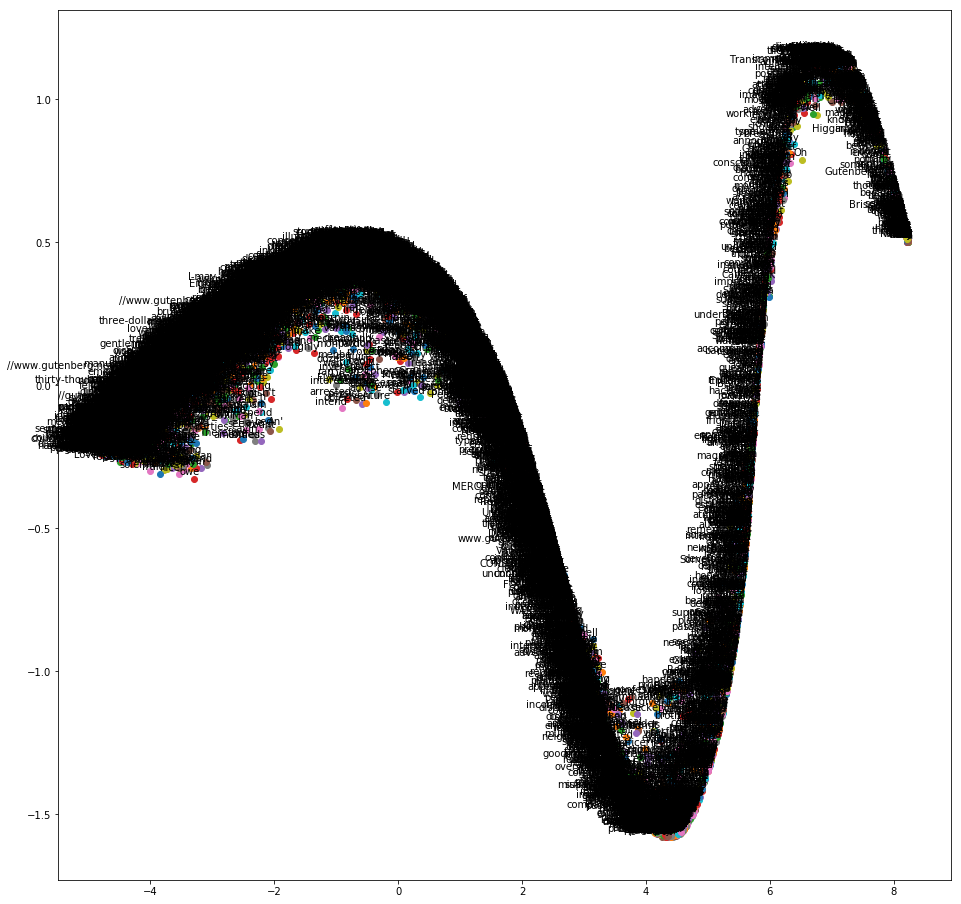

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


start TSNE for 174.txt
end TSNE for 174.txt


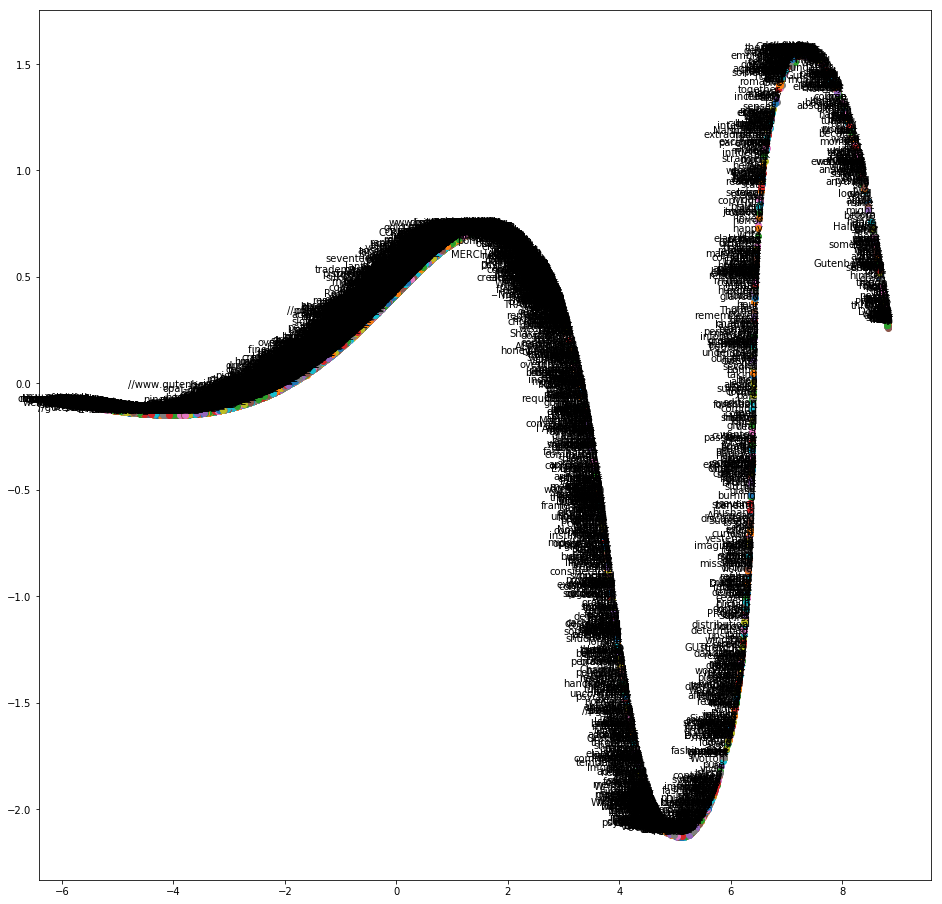

In [10]:
#@title 3. Visualize two models

tsne_iterations = 250 # is minimum value. Increase if you have spare time

for text_filename in TEXTS:
  model = gensim.models.Word2Vec.load(form_model_filename(text_filename))
  labels = []
  tokens = []
  for word in model.wv.vocab:
      tokens.append(model[word])
      labels.append(word)
  tsne_model = sklearn.manifold.TSNE(perplexity=40, n_components=2, init='pca', n_iter=tsne_iterations, random_state=1337) 
  new_values = tsne_model.fit_transform(tokens)
  x = []
  y = []
  for value in new_values:
      x.append(value[0])
      y.append(value[1])
  matplotlib.pyplot.figure(figsize=(16, 16))
  for i in range(len(x)):
      matplotlib.pyplot.scatter(x[i], y[i])
      matplotlib.pyplot.annotate(labels[i],
                   xy=(x[i], y[i]),
                   xytext=(5, 2),
                   textcoords='offset points',
                   ha='right',
                   va='bottom')
  matplotlib.pyplot.show()

In [78]:
#@title 4. For one model, evaluate the result of a sample query with the P@k (P@5) for the example query

model = gensim.models.Word2Vec.load(form_model_filename('1056.txt'))
print(form_model_test_description(w2v_window, w2v_sg))
test_queries(model)

Testing Model. Window size = 10. Algo = CBOW.
similarity between 'Martin' & 'Eden': 0.9782963991165161
similarity between 'Ruth' & 'Morse': 0.9983966946601868
similarity between 'working' & 'class': 0.9968375563621521
similarity between 'write' & 'book': 0.9211280345916748
similarity between 'ship' & 'sea': 0.998131275177002


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [79]:
#@title 5. Try different settings, different window sizes (2,5,10) and see how the evaluation measure changes

with open('1056.txt', 'r') as book_file:
    corpus = book_file.read()
    
    for window_size in [2, 5, 10]:
      model = gensim.models.Word2Vec(
        [nltk.tokenize.word_tokenize(sent) for sent in nltk.tokenize.sent_tokenize(corpus)],
        size=w2v_size,
        window=window_size,
        min_count=w2v_min_count,
        workers=4,
        sg=w2v_sg
      )
      print(form_model_test_description(window_size, w2v_sg))
      test_queries(model)
      print()

Testing Model. Window size = 2. Algo = CBOW.
similarity between 'Martin' & 'Eden': 0.9562191367149353
similarity between 'Ruth' & 'Morse': 0.9898132681846619
similarity between 'working' & 'class': 0.998859167098999
similarity between 'write' & 'book': 0.9657742381095886
similarity between 'ship' & 'sea': 0.995489776134491



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Testing Model. Window size = 5. Algo = CBOW.
similarity between 'Martin' & 'Eden': 0.9793441891670227
similarity between 'Ruth' & 'Morse': 0.9980093836784363
similarity between 'working' & 'class': 0.9994096755981445
similarity between 'write' & 'book': 0.9323127269744873
similarity between 'ship' & 'sea': 0.9920669198036194

Testing Model. Window size = 10. Algo = CBOW.
similarity between 'Martin' & 'Eden': 0.8907260298728943
similarity between 'Ruth' & 'Morse': 0.9992657899856567
similarity between 'working' & 'class': 0.9973103404045105
similarity between 'write' & 'book': 0.8456274271011353
similarity between 'ship' & 'sea': 0.9822590351104736



In [80]:
#@title 6. Compare the results of SkipGram versus CBOW algorithms, again with P@5

with open('1056.txt', 'r') as book_file:
    corpus = book_file.read()
    
    for sg in [0, 1]:
      model = gensim.models.Word2Vec(
        [nltk.tokenize.word_tokenize(sent) for sent in nltk.tokenize.sent_tokenize(corpus)],
        size=w2v_size,
        window=w2v_window,
        min_count=w2v_min_count,
        workers=4,
        sg=sg
      )
      print(form_model_test_description(w2v_window, sg))
      test_queries(model)
      print()

Testing Model. Window size = 10. Algo = CBOW.
similarity between 'Martin' & 'Eden': 0.9843103289604187
similarity between 'Ruth' & 'Morse': 0.998847484588623
similarity between 'working' & 'class': 0.997224748134613
similarity between 'write' & 'book': 0.9110764265060425
similarity between 'ship' & 'sea': 0.9970144033432007



/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Testing Model. Window size = 10. Algo = Skip-Gram.
similarity between 'Martin' & 'Eden': 0.8331432938575745
similarity between 'Ruth' & 'Morse': 0.9212775826454163
similarity between 'working' & 'class': 0.9611179828643799
similarity between 'write' & 'book': 0.8084721565246582
similarity between 'ship' & 'sea': 0.9556869864463806



In [81]:
#@title 7. Make sentence representations which create sentence vectors, and use idf weighting to weight the words in the sentence 

for text_filename in TEXTS:
  with open(text_filename, 'r') as file:
    corpus = file.read()

  docs = [nltk.tokenize.word_tokenize(sent) for sent in nltk.tokenize.sent_tokenize(corpus)]
  tokens = set([token for doc in docs for token in doc])
  idf = {}

  for token in tokens:
    idf[token] = math.log10(len(tokens) / sum([token in doc for doc in docs]))

  with open(form_idf_filename(text_filename), 'wb') as file:
    pickle.dump(idf, file)
print(os.listdir())

['.config', '174_size100_window5_mincount1_sg0.model', '174.txt', '.ipynb_checkpoints', '1056.idf', '1056_size100_window5_mincount1_sg0.model', '174.idf', '1056.txt', 'sample_data']


In [83]:
#@title 8. Test a few example queries, and output the closest sentences to the example queries

queries = [
  [
    ['Martin', 'Eden'],
    ['he', 'questioned'],
    ['She', 'paused', 'for', 'breath']
  ],
  [
    ['Lord', 'Henry', 'looked', 'over'],
    ['How', 'dreadful'],
    ['He', 'thought']
  ]
] 

for i, text_filename in enumerate(TEXTS):
  with open(form_idf_filename(text_filename), 'rb') as file:
    idf = pickle.load(file)
  with open(text_filename, 'r') as file:
    corpus = file.read()
  model = gensim.models.Word2Vec.load(form_model_filename(text_filename))
  docs = [nltk.tokenize.word_tokenize(sent) for sent in nltk.tokenize.sent_tokenize(corpus)]
  
  for query in queries[i]:
    similarities = []
    sent = sum([model.wv[word] * idf[word] for word in query])
    for doc in docs:
      doc_vector = sum([model.wv[word] * idf[word] for word in doc])
      similarities.append((doc, sklearn.metrics.pairwise.cosine_similarity(sent.reshape(1, -1), doc_vector.reshape(1, -1))))
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
    print('Query: ' + str(query))
    for similar in similarities[:5]:
      print(similar[0])
    print()

Query: ['Martin', 'Eden']
['Martin', 'winced', ',', 'then', 'grinned', '.']
['Martin', 'Eden', 'nodded', '.']
['``', 'By', 'the', 'way', ',', 'Mr.', 'Eden', ',', "''", 'she', 'called', 'back', ',', 'as', 'she', 'was', 'leaving', 'the', 'room', '.']
['``', 'Elimination', 'of', 'waste', 'motion', ',', "''", 'Martin', 'phrased', 'it', 'as', 'he', 'watched', 'and', 'patterned', 'after', '.']
['``', 'Bill', ',', "''", 'he', 'answered', ',', 'nodding', 'his', 'head', '.']

Query: ['he', 'questioned']
['he', 'questioned', '.']
['he', 'screamed', '.']
['he', 'rejoined', '.']
['he', 'shouted', '.']
['he', 'screamed', 'hoarsely', '.']

Query: ['She', 'paused', 'for', 'breath']
['He', 'went', 'further', ',', 'and', 'in', 'a', 'private', 'talk', 'with', 'Hermann', 'told', 'him', 'to', 'keep', 'his', 'eyes', 'open', 'for', 'an', 'automobile', 'agency', 'and', 'garage', ',', 'for', 'there', 'was', 'no', 'reason', 'that', 'he', 'should', 'not', 'be', 'able', 'to', 'run', 'both', 'establishments', 'su